# `geopandas`

GeoPandas is a Python library that extends `pandas` by adding support for geospatial data. 

## Reproducible file paths

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

To import data we first use `os` package to create a reproducible file path:

In [2]:
fp = os.path.join('data','gbif_sus_scrofa_california', 'gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [3]:
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [4]:
fp = os.path.join('data','ca_state_boundary','ca_state_boundary.shp')
ca_boundary = gpd.read_file(fp)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## `GeoSeries` and `GeoDataFrame`

`geopandas.GeoDataFrame` = core structure in geopandas = `pandas.DataFram` plus a dedicated geometry column that can perform spatial operations. 

**geometry column** holds the geometry (points, polygons, etc) of each spatial feature. The type of this columns `geopadas.GeoSeries`. 

In [5]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [6]:
# Check the data type of the pigs dataframe
print(type(pigs))

# Check the data type of the geometry column
print(type(pigs.geometry))

# Check the data type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [7]:
# Check the data type of each column
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [8]:
# Check type of each element in the geomentry column
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

What is the geometry type of the single feature in the CA state boundary?

In [9]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS

**coordinate reference system (CRS)** = instructions to locate each spatial feature of our data frame on the surface of the Earth. 

In [10]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# Examine CRS details
print('Ellipsoid:', pigs.crs.ellipsoid)
print('Datum:', pigs.crs.datum)
print('Is geographic?:', pigs.crs.is_geographic)
print('Is projected?:', pigs.crs.is_projected)

Ellipsoid: WGS 84
Datum: World Geodetic System 1984 ensemble
Is geographic?: True
Is projected?: False


In [12]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [13]:
# Examine CRS and extent of CA boundary
print('CRS: ', ca_boundary.crs, '\n')
print(ca_boundary.total_bounds)

CRS:  EPSG:4326 

[-124.48201686   32.52883674 -114.13122248   42.00950827]


In [14]:
pigs.crs == ca_boundary.crs

True

## Data wrangling

You can use all your `pandas` data wrangling to wrangle `geopandas.geoDataFrames`. 

## Example

# Examine pig observations by year

In [15]:
pigs['year'].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [16]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs['year']>=2020]

# Check length of original dataframe
print('Total number of observations: ', len(pigs))

# Check length of new dataframe
print('Number of observations since 2020: ', len(pigs_recent))

Total number of observations:  1046
Number of observations since 2020:  606


# Create a map (preliminary)

`gpd.GeoDataFrame` has a `plot()` method that quickly creates a map for our data using the geospatial information.

<Axes: >

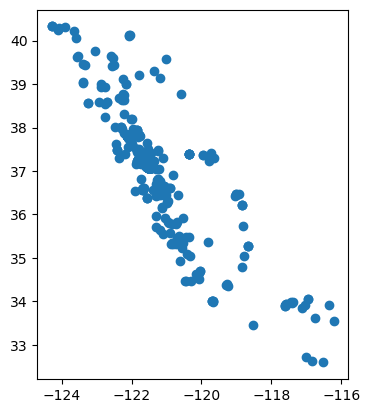

In [17]:
pigs_recent.plot()

## `matplotlib`

we can interact with `matplotlib` via its `pyplot` interface. 

Matplotlib graphs the data in a **figure** that can have one or more **axes**. The axes is *only* the area specified by the x axis and the y axis what is plotted in it. A figure can include multiple axes in it. 

To create a blank figure:

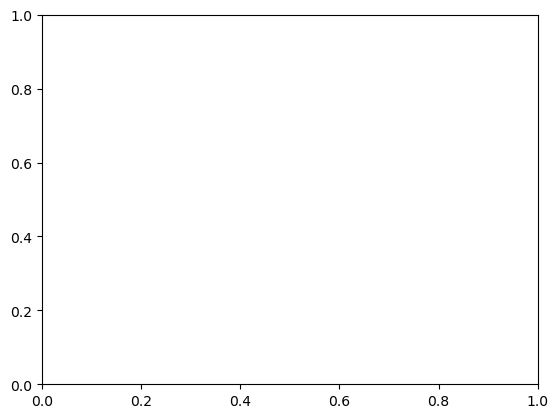

In [ ]:
# Initialize empty figure (fig) and axis (ax)
fig, ax = plt.subplots()  # Returns two objefts: fig and ax

# Display figure
plt.show()

### Adding a layer

When using `matplotlib` it can be useful to think of creating a plot as adding layers on an axis. 

Example:

The first layer we want to add to our axis is the `pigs_recent` point data

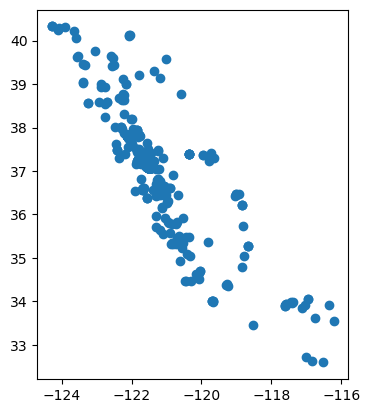

In [19]:
# Initialize empty figure and axis
fig, ax = plt.subplots()

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

# Display figure
plt.show()

## Customization 

Some custimazation can be done directly in `plot()` method for the dataframe. Some other is done by updating attributes of the axis `ax`. 

Example:

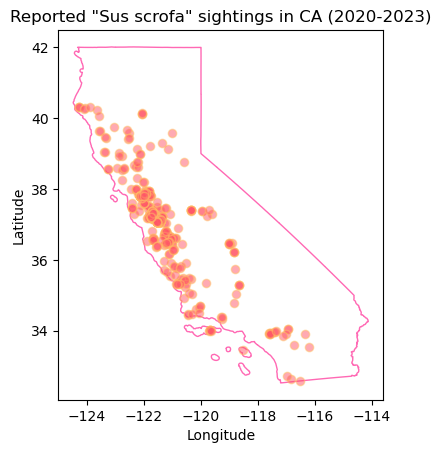

In [28]:
# Initialize empty figure and axis
fig, ax = plt.subplots()

# Add CA boundary
ca_boundary.plot(ax=ax,
                 color='none', 
                 edgecolor = 'hotpink')

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,     # Adjust transparency
                 color='#FF5768',  # Update color
                 edgecolor='#FFBF65'
                 )

# Update axis
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()